# Clustering Data with Unsupervised Machine Learning

## Creating the base k-means model

In [1]:
import pandas as pd

#Reading in the dataset

df = pd.read_csv("fraud_prediction.csv")

#Dropping the target feature and the index

df = df.drop(["Unnamed: 0","isFraud"],axis=1)

In [2]:
from sklearn.cluster import KMeans

#Initializing K-mean with 2 clusters


k_means = KMeans(n_clusters = 2)

#Fitting the model on the data

k_means.fit(df)

KMeans(n_clusters=2)

In [3]:
# Extracting labels

target_labels = k_means.predict(df)

#Printing the labels

target_labels

array([0, 0, 0, ..., 1, 0, 1])

In [4]:
# The above arrays shows that Mobile transactions that have a 0 fall into one group while transactions that have a label of 1 
# fall into the second group.

## The optimal number of clusters

In [5]:
# In order to compute inertia for the model 

# Inertia of the present model

k_means.inertia_

4.993728960462546e+17

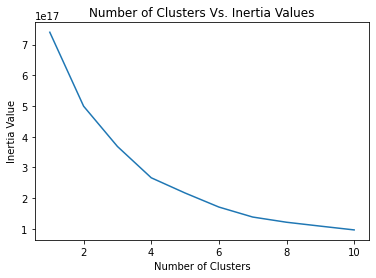

In [7]:
#Plotting the inertia scores for different numbers of clusters to find the optimal numbers for the clusters

import matplotlib.pyplot as plt
import seaborn as sns

#Initialize a list of clusters from 1 to 10 clusters

clusters = [1,2,3,4,5,6,7,8,9,10]

#Create an empty list in order to store the inertia values

inertia_values = []

for cluster in clusters:
    #Build a k-means model for each cluster value
    
    k_means = KMeans(n_clusters = cluster)
    
    #Fit the model to the data
    
    k_means.fit(df)
    
    #Store inertia value of each model into the empty list 
    
    inertia_values.append(k_means.inertia_)

    
#Plot the results


sns.lineplot(x= clusters,y=inertia_values)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Value")
plt.title("Number of Clusters Vs. Inertia Values")
plt.show()


## Feature engineering for optimization

### Scaling 

In [8]:
# Scaling the features in our fraud detection dataset

from sklearn.preprocessing import StandardScaler

#Setting up the standard scaler

scale_data = StandardScaler()


#Scaling the data

scale_data.fit(df)


df_scaled = scale_data.transform(df)


#Applying the K-Means algorithm on the scaled data

#Initializing K-means with 2 clusters

k_means = KMeans(n_clusters=2)

#Fitting the model on the data

k_means.fit(df_scaled)

#Inertia of present model

k_means.inertia_

267153.98488274426

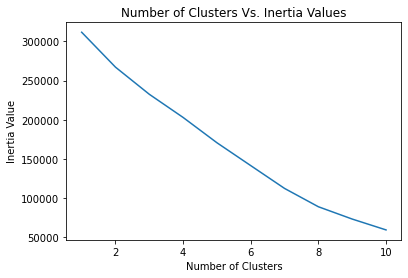

In [9]:
#Initialize a list of clusters from 1 to 10 clusters

clusters = [1,2,3,4,5,6,7,8,9,10]

#Create an empty list in order to store the inertia values

inertia_values = []

for cluster in clusters:
    #Build a k-means model for each cluster value
    
    k_means = KMeans(n_clusters=cluster)
    
    #Fit the model to the data
    
    k_means.fit(df_scaled)
    
    # Store inertia value of each model into the empty list
    
    inertia_values.append(k_means.inertia_)
# Plot the results


sns.lineplot(x=clusters,y=inertia_values)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Value")
plt.title("Number of Clusters Vs. Inertia Values")
plt.show()

## Principal component anaylsis

In [10]:
# Performing dimensionality reduction using PCA

from sklearn.decomposition import PCA

#Initalize a PCA model with 5 features

pca_model = PCA(n_components = 5)

#Fit the model to the scaled dataframe

pca_model.fit(df_scaled)


#Transform the features so that it is de-correlated

pca_transform = pca_model.transform(df_scaled)

#Check to see if there are only 5 features

pca_transform.shape

(28345, 5)

In [11]:
# Creating a new k-means model with only the principal component features 

#Applying the K-Means algorithm on the scaled data

#Initializing k-means with 2 clusters

k_means = KMeans(n_clusters =2) # Fitting the model on the data

k_means.fit(pca_transform)

#Inertia of present model

k_means.inertia_

186063.82710584125

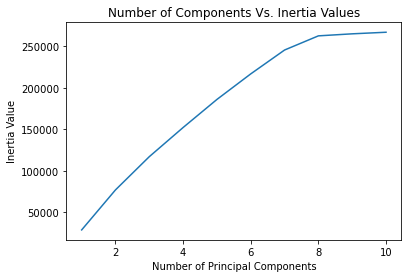

In [12]:
# Evaluating inertia scores for different numbers of principal components of features

#Initialize a list of principal components

components = [1,2,3,4,5,6,7,8,9,10]

#Create an empty list in order to store the inertia values

inertia_values = []

for comp in components:
    #Initialize a PCA model
    
    pca_model = PCA(n_components = comp)
    
    #Fit the model to the dataframe
    
    pca_model.fit(df_scaled)
    
    
    #Transform the features so that it is de-correlated
    
    pca_transform = pca_model.transform(df_scaled)
    
    #Build a k-means model
    
    k_means = KMeans(n_clusters =2)
    
    #Fit the model to the data
    
    k_means.fit(pca_transform)
    
    # Store inertia value of each model into the empty list
    
    inertia_values.append(k_means.inertia_)
    
#Plot the results


sns.lineplot(x = components, y = inertia_values)
plt.xlabel("Number of Principal Components")
plt.ylabel("Inertia Value")
plt.title("Number of Components Vs. Inertia Values")
plt.show()

## Cluster visualization

## t-SNE or t-distributed stochastic neighbor embedding

In [13]:
# Creating a set of prediction labels that we can merge into the unlabeled dataset 

#Initializing K-means with 2 clusters

k_means = KMeans(n_clusters = 2)

#Fitting the model on the data

k_means.fit(df)

#Extracting labels

target_labels = k_means.predict(df)

#Converting the labels to a series

target_labels = pd.Series(target_labels)

#Merging the labels to a series


df = pd.merge(df, pd.DataFrame(target_labels),left_index=True,right_index=True)

#Renaming the target

df["fraud"] = df[0]
df = df.drop([0],axis=1)

In [14]:
from sklearn.manifold import TSNE

#Creating the features

features = df.drop("fraud",axis=1).values

target = df["fraud"].values

#Initialize a TSNE object

tsne_object = TSNE()

#Fit and transform the features using the TSNE object

transformed = tsne_object.fit_transform(features)

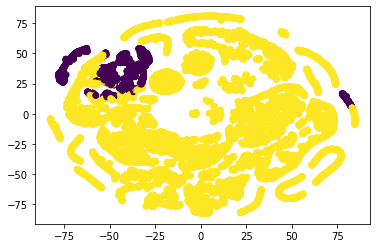

In [16]:
#Creating a t-SNE visualization

x_axis = transformed[:,0]

y_axis = transformed[:,1]

plt.scatter(x_axis,y_axis,c = target)

plt.show()

## Hierarchical clustering

### Implementing hierarchical clustering

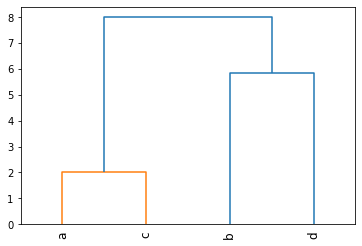

In [18]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import numpy as np 
import matplotlib.pyplot as plt


#Creating an array of 4 features

array = np.array([[1,2,3,4],[5,6,7,8],[2,3,4,5],[5,6,4,3]])

feature_names = ["a","b","c","d"]

#Creating clusters

clusters = linkage(array, method= "complete")

#Creating a dendrogram

dendrogram(clusters,labels = feature_names,leaf_rotation=90)
plt.show()

## Going from unsupervised to supervised learning

### Building the decision tree

In [22]:
#importing the necessary packages 

from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

In [25]:
#Reading in the dataset

df = pd.read_csv('fraud_prediction.csv')

#Dropping the target feature & the index

df = df.drop(['Unnamed: 0', 'isFraud'], axis = 1)

In [26]:
#Initializing K-means with 2 clusters

k_means = KMeans(n_clusters = 2)

#Fitting the model on the data

k_means.fit(df)

KMeans(n_clusters=2)

In [27]:
#Extracting labels 

target_labels = k_means.predict(df)

In [28]:
#Converting the labels to a series 

target_labels = pd.Series(target_labels)

In [29]:
#Merging the labels to the dataset

df = pd.merge(df, pd.DataFrame(target_labels), left_index=True, right_index=True)

In [30]:
#Renaming the target 

df['fraud'] = df[0]
df = df.drop([0], axis = 1)

In [31]:
#Initializing an empty DT classifier with a random state value of 42

dt_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 42)

In [32]:
#Creating the features

features = df.drop('fraud', axis = 1).values

target = df['fraud'].values

In [33]:
#Fitting the classifier on the training data 

dt_classifier.fit(features, target)

DecisionTreeClassifier(random_state=42)

In [34]:
#Creating a dataframe with the features only

features = df.drop('fraud', axis = 1)

In [35]:
dot_data = tree.export_graphviz(dt_classifier, out_file=None, feature_names= features.columns)

In [36]:
# Draw graph

graph = pydotplus.graph_from_dot_data(dot_data)

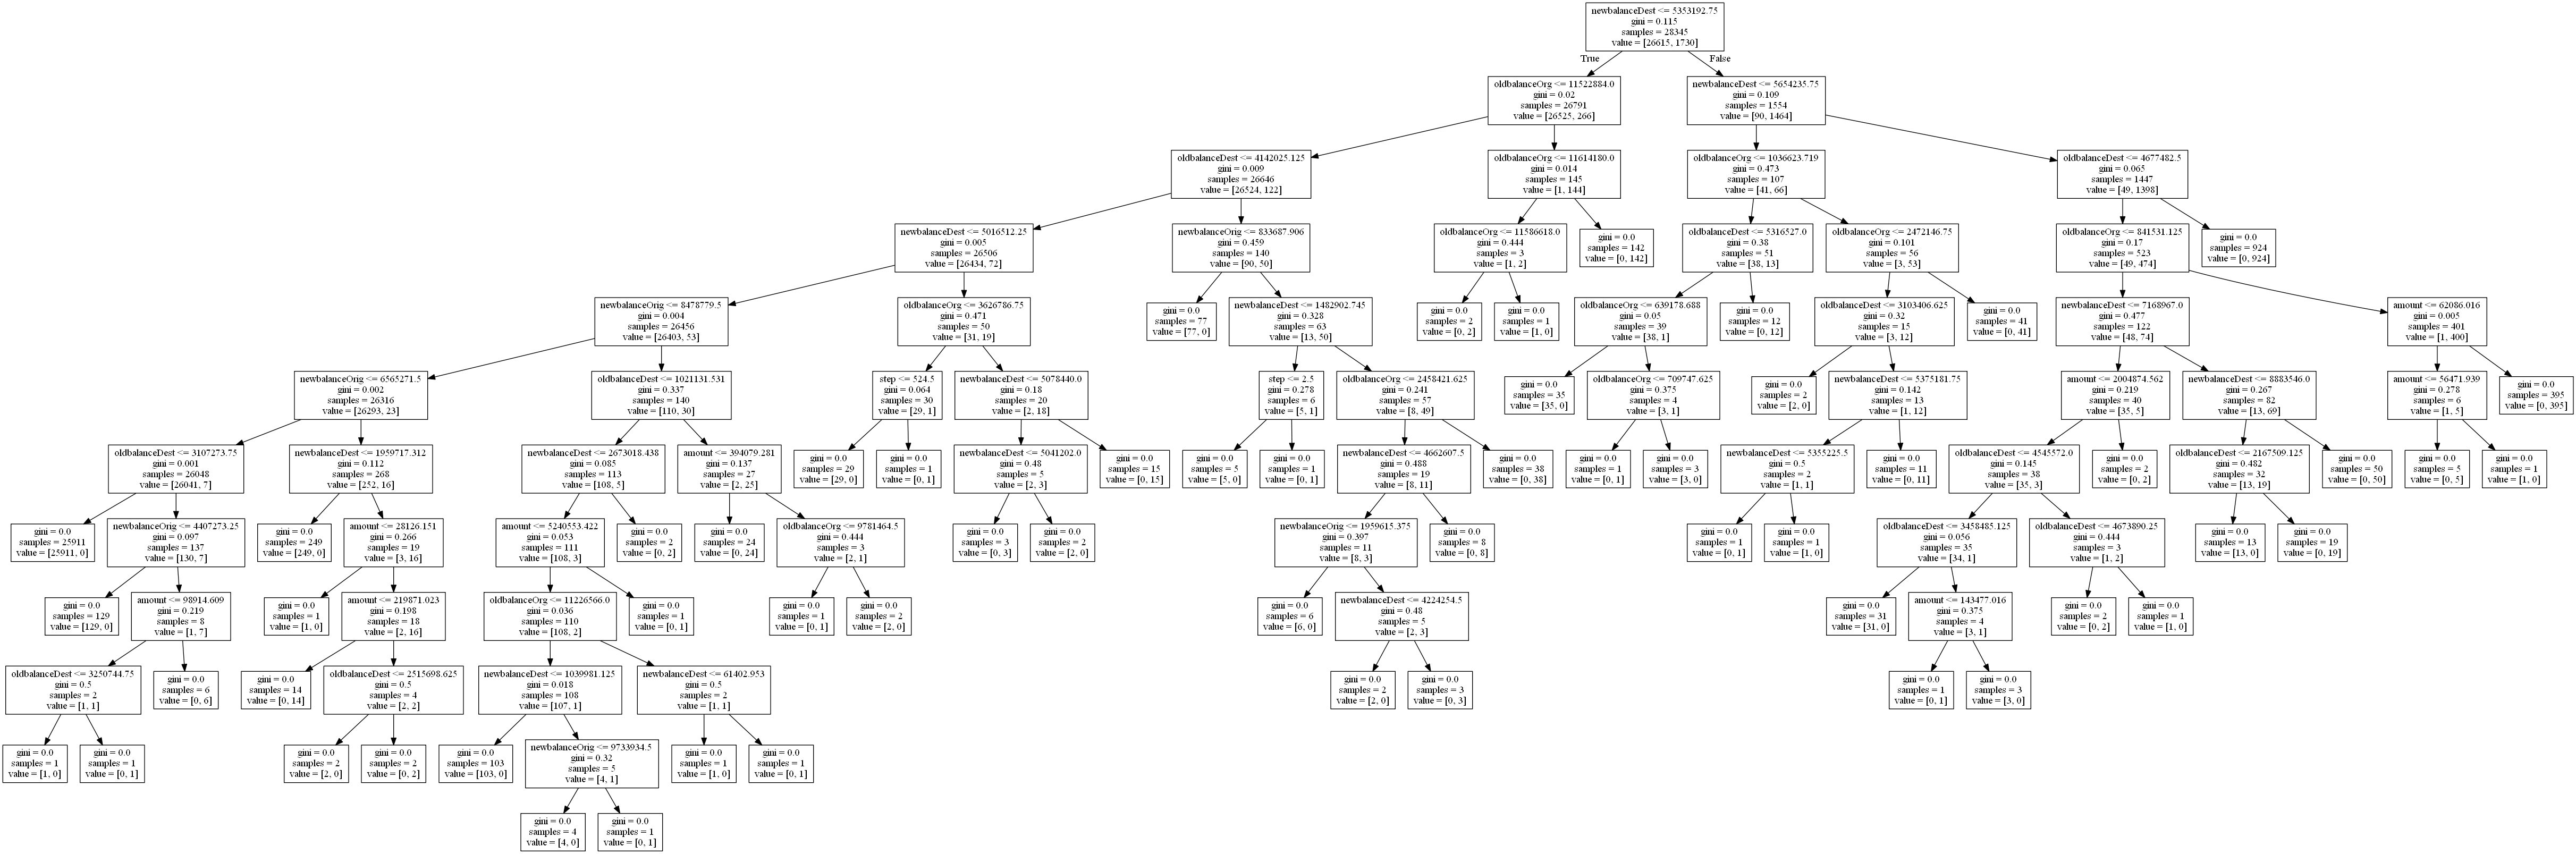

In [37]:
#Show graph 

Image(graph.create_png())